# COVID-19 Analysis: Total Cases and Deaths vs Population

In [86]:
import pandas as pd

df = pd.read_csv("owid-covid-data.csv")

# Descending order by date
df['datetime'] = pd.to_datetime(df['date'])
df = df.sort_values(by='datetime', ascending=False)

# Filter columns
df = df[['datetime', 'location', 'population', 'total_cases', 'total_deaths']]
countries = df.location.unique()
countries = np.delete(countries, np.where(countries == 'World'))

# Select latest timestamp of each country
df_list = [df.loc[df['location'] == name].head(1) for name in countries]
df = pd.concat(df_list)

# For plots (later on)
colors = [np.random.rand(3,) for _ in countries]

## Total cases

In [108]:
# Choose the N largest for plotting
data = df.nlargest(20, 'total_cases')
countries = data.location.unique()
data

,datetime,location,population,total_cases,total_deaths
31984,2020-07-30,United States,3.310026e+08,4426982.0,150713.0
4549,2020-07-30,Brazil,2.125594e+08,2552265.0,90134.0
14293,2020-07-30,India,1.380004e+09,1583792.0,34968.0
25367,2020-07-30,Russia,1.459345e+08,828990.0,13673.0
27880,2020-07-30,South Africa,5.930869e+07,471123.0,7497.0
20078,2020-07-30,Mexico,1.289328e+08,408449.0,45361.0
24100,2020-07-30,Peru,3.297185e+07,400683.0,18816.0
6461,2020-07-30,Chile,1.911621e+07,351575.0,9278.0
31771,2020-07-30,United Kingdom,6.788600e+07,301455.0,45961.0
14712,2020-07-30,Iran,8.399295e+07,298909.0,16343.0


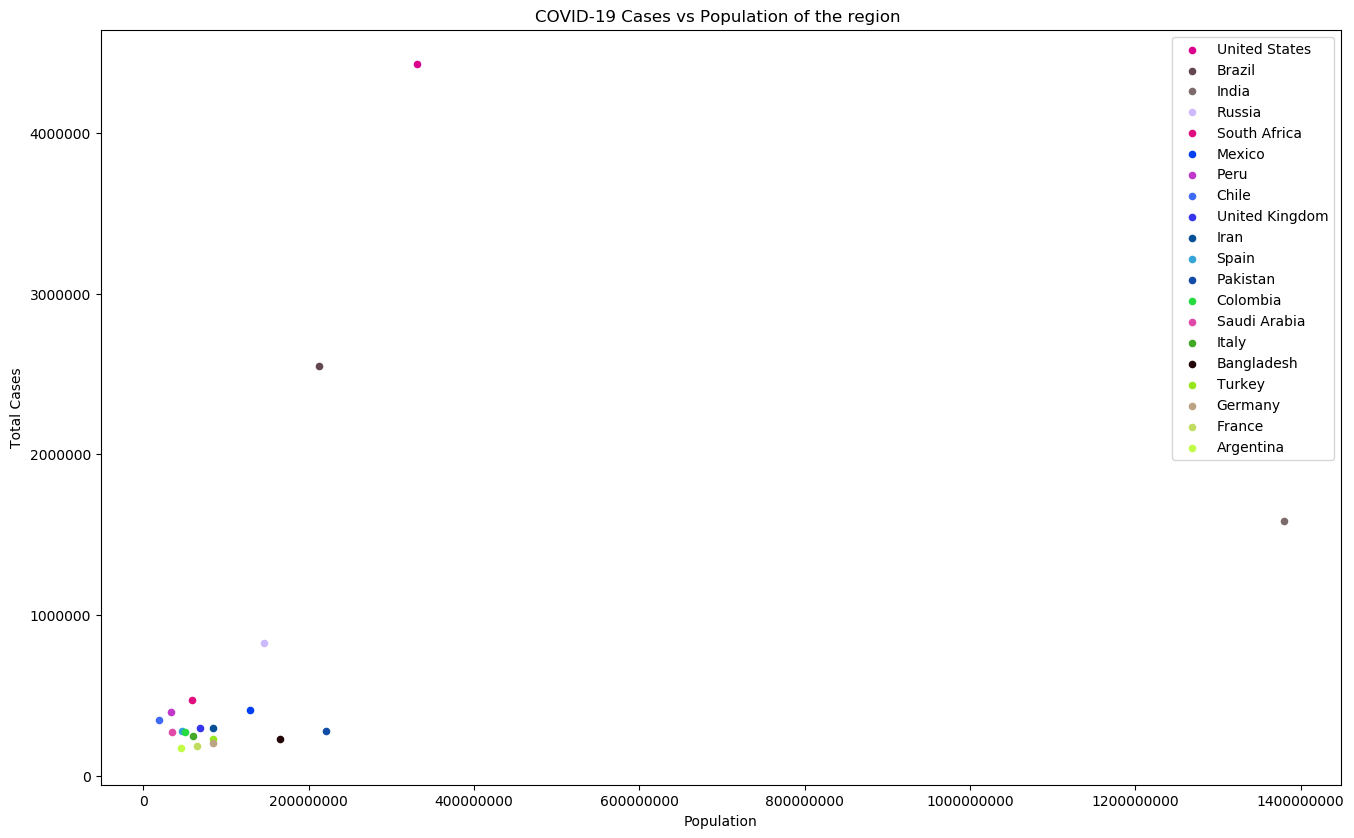

In [117]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16,10), dpi=100)

for i, country in enumerate(countries):
    plt.scatter('population', 'total_cases',
               data=data.loc[data.location == country,:],
               s=20, c=[colors[i]], label=str(country))

plt.xlabel('Population')
plt.ylabel('Total Cases')

plt.ticklabel_format(style='plain')
plt.title("COVID-19 Cases vs Population of the region ")
plt.legend(fontsize=10)

plt.savefig('cases.png', dpi='figure', bbox_inches='tight')
plt.show()

## Total Deaths

In [106]:
# Choose the N largest for plotting
data = df.nlargest(20, 'total_deaths')
countries = data.location.unique()
data

,datetime,location,population,total_cases,total_deaths
31984,2020-07-30,United States,3.310026e+08,4426982.0,150713.0
4549,2020-07-30,Brazil,2.125594e+08,2552265.0,90134.0
31771,2020-07-30,United Kingdom,6.788600e+07,301455.0,45961.0
20078,2020-07-30,Mexico,1.289328e+08,408449.0,45361.0
15692,2020-07-30,Italy,6.046183e+07,246776.0,35129.0
14293,2020-07-30,India,1.380004e+09,1583792.0,34968.0
11034,2020-07-30,France,6.527351e+07,185196.0,30238.0
28421,2020-07-29,Spain,4.675478e+07,282641.0,28441.0
24100,2020-07-30,Peru,3.297185e+07,400683.0,18816.0
14712,2020-07-30,Iran,8.399295e+07,298909.0,16343.0


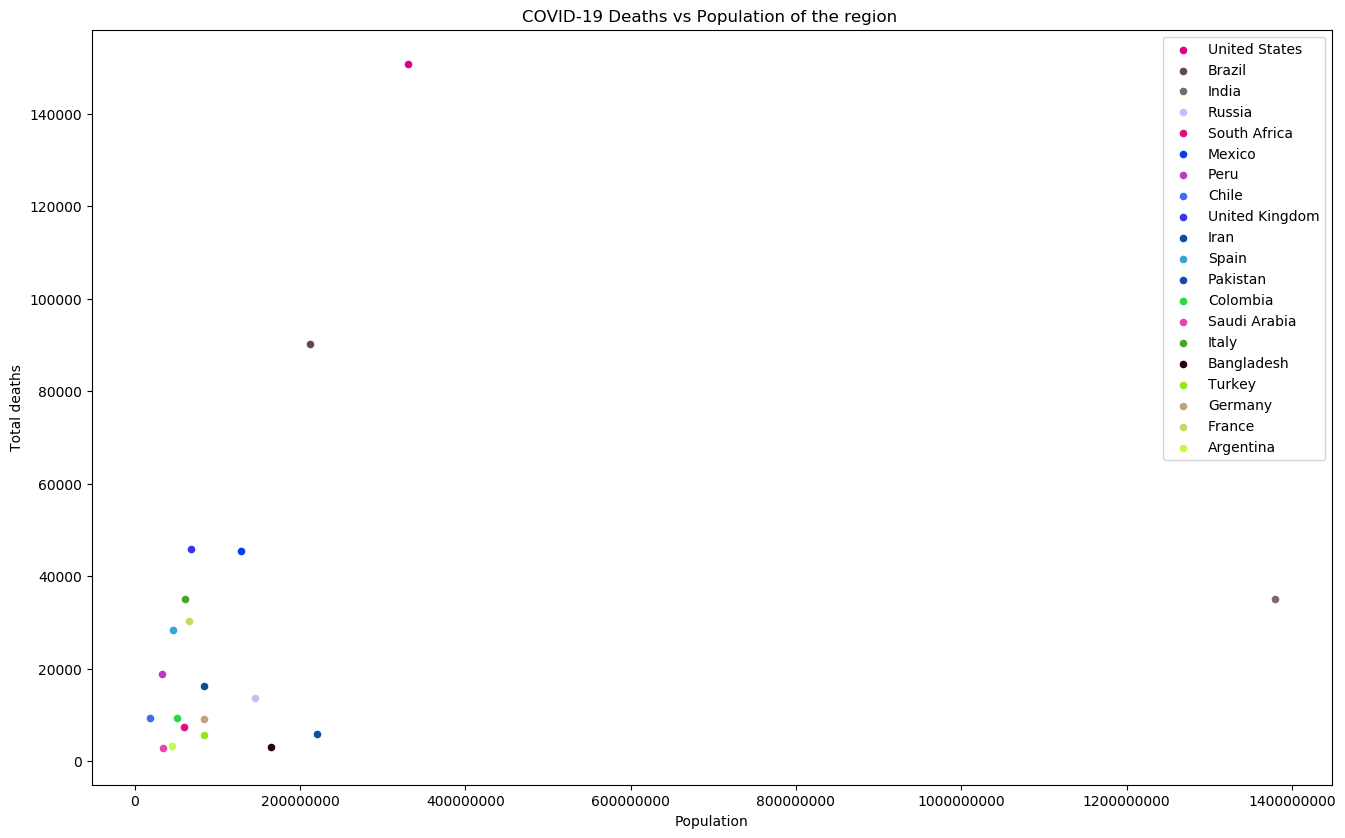

In [118]:
plt.figure(figsize=(16,10), dpi=100)

for i, country in enumerate(countries):
    plt.scatter('population', 'total_deaths',
               data=data.loc[data.location == country,:],
               s=20, c=[colors[i]], label=str(country))

plt.xlabel('Population')
plt.ylabel('Total deaths')

plt.ticklabel_format(style='plain')
plt.title("COVID-19 Deaths vs Population of the region ")
plt.legend(fontsize=10)

plt.savefig('deaths.png', dpi='figure', bbox_inches='tight')
plt.show()